In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("datasets/ecg_data.txt", sep="\t")
data = np.array(data)
data

array([[200.004,   4.82 ,   2.135],
       [200.008,   4.805,   2.19 ],
       [200.012,   4.75 ,   2.285],
       ...,
       [379.988,   4.88 ,   5.085],
       [379.992,   4.87 ,   5.085],
       [379.996,   4.89 ,   5.115]])

In [44]:
w = 10
Xtr = data[:1000]  # 学習
X_1 = data[1000:2000]  # テスト
X_2 = data[2000:3000]

In [45]:
Dtr = np.array([Xtr[i : i + w] for i in range(1001 - w)])  # window毎に切り出していく
D_1 = np.array([X_1[i : i + w] for i in range(1001 - w)])
D_2 = np.array([X_2[i : i + w] for i in range(1001 - w)])

In [48]:
Dtr

array([[[200.004,   4.82 ,   2.135],
        [200.008,   4.805,   2.19 ],
        [200.012,   4.75 ,   2.285],
        ...,
        [200.032,   4.68 ,   3.365],
        [200.036,   4.685,   3.695],
        [200.04 ,   4.675,   3.97 ]],

       [[200.008,   4.805,   2.19 ],
        [200.012,   4.75 ,   2.285],
        [200.016,   4.71 ,   2.44 ],
        ...,
        [200.036,   4.685,   3.695],
        [200.04 ,   4.675,   3.97 ],
        [200.044,   4.67 ,   4.24 ]],

       [[200.012,   4.75 ,   2.285],
        [200.016,   4.71 ,   2.44 ],
        [200.02 ,   4.695,   2.62 ],
        ...,
        [200.04 ,   4.675,   3.97 ],
        [200.044,   4.67 ,   4.24 ],
        [200.048,   4.67 ,   4.53 ]],

       ...,

       [[203.956,   4.785,   4.995],
        [203.96 ,   4.79 ,   4.995],
        [203.964,   4.79 ,   4.995],
        ...,
        [203.984,   4.765,   5.   ],
        [203.988,   4.79 ,   4.995],
        [203.992,   4.8  ,   4.98 ]],

       [[203.96 ,   4.79 ,   4.995],
  

In [72]:
U_test, sv_test, V_test = np.linalg.svd(Xtr)  # 特異値分解 (A)
U_train_1, sv_train_1, V_train_1 = np.linalg.svd(X_1)  # 特異値分解 (B)
U_train_2, sv_train_2, V_train_2 = np.linalg.svd(X_2)  # 特異値分解 (B)

In [58]:
U_test

array([[-0.03129774,  0.08286629, -0.00784729, ..., -0.0324893 ,
        -0.03258776, -0.0325824 ],
       [-0.03129853,  0.08133112, -0.01041934, ...,  0.00862812,
         0.01141927,  0.01144749],
       [-0.03129933,  0.07864911, -0.02051762, ..., -0.00861848,
        -0.00953427, -0.00940022],
       ...,
       [-0.0319326 ,  0.00678814, -0.01175078, ...,  0.99884317,
        -0.0011945 , -0.00119367],
       [-0.03193317,  0.00677627, -0.0146934 , ..., -0.00119054,
         0.9987631 , -0.00123604],
       [-0.03193382,  0.00664054, -0.01467895, ..., -0.00118979,
        -0.00123609,  0.99876476]])

In [68]:
sv_test

array([6.39187100e+03, 3.60723221e+01, 5.12639714e+00])

In [60]:
r_test = 3
r_train = 3

In [73]:
C_1 = V_train_1[:r_train, :] @ V_test[:r_test, :].T  # 行列の積 (C)
C_2 = V_train_2[:r_train, :] @ V_test[:r_test, :].T  # 行列の積 (C)

In [62]:
V_train_1

array([[-0.99940608, -0.02369667, -0.02501897],
       [-0.0243079 , -0.02983427,  0.99925925],
       [-0.02442554,  0.99927393,  0.02924054]])

In [32]:
V_train_2

array([[-0.9994301 , -0.02355761, -0.02417663],
       [-0.02348378, -0.02925677,  0.99929603],
       [-0.02424836,  0.99929429,  0.02868688]])

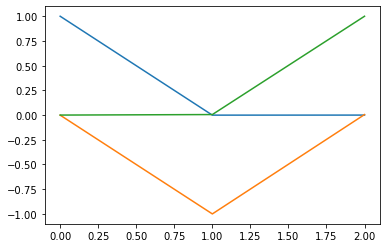

In [67]:
plt.plot(C_1)

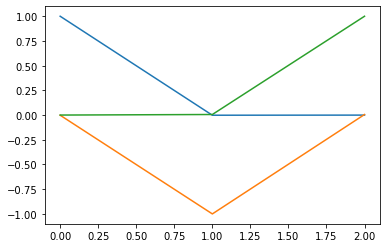

In [63]:
plt.plot(C_2)

In [69]:
normC_1 = np.linalg.norm(C_1, ord=2)
normC_2 = np.linalg.norm(C_2, ord=2)

In [70]:
print(1 - normC_1)
print(1 - normC_2)

-2.220446049250313e-16
-2.220446049250313e-16
